# Import Required Libraries
Let's start by importing the essential libraries for data manipulation and visualization: pandas, numpy, matplotlib, and seaborn.

In [17]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Load the Dataset
Now, we'll load the `Crop_recommendation.data.csv` file into a pandas DataFrame for analysis.

In [18]:
# Load the Dataset
df = pd.read_csv('Crop_recommendation.data.csv')

# Display Basic Information
Let's check the shape, column names, and data types of the dataset to understand its structure.

In [19]:
# Display Basic Information
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

Shape of the dataset: (2200, 8)

Column names: ['Nitrogen', 'Phosphorus', 'potassium', 'temperature(in c)', 'humidity(%)', 'ph', 'rainfall(mm)', 'crop']

Data types:
 Nitrogen               int64
Phosphorus             int64
potassium              int64
temperature(in c)    float64
humidity(%)          float64
ph                   float64
rainfall(mm)         float64
crop                  object
dtype: object


# Show Sample Data
Here are the first few rows of the dataset:

In [20]:
# Show Sample Data
df.head()

,Nitrogen,Phosphorus,potassium,temperature(in c),humidity(%),ph,rainfall(mm),crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Visualize Feature Distributions
Let's plot histograms for each numerical feature to understand their distributions.

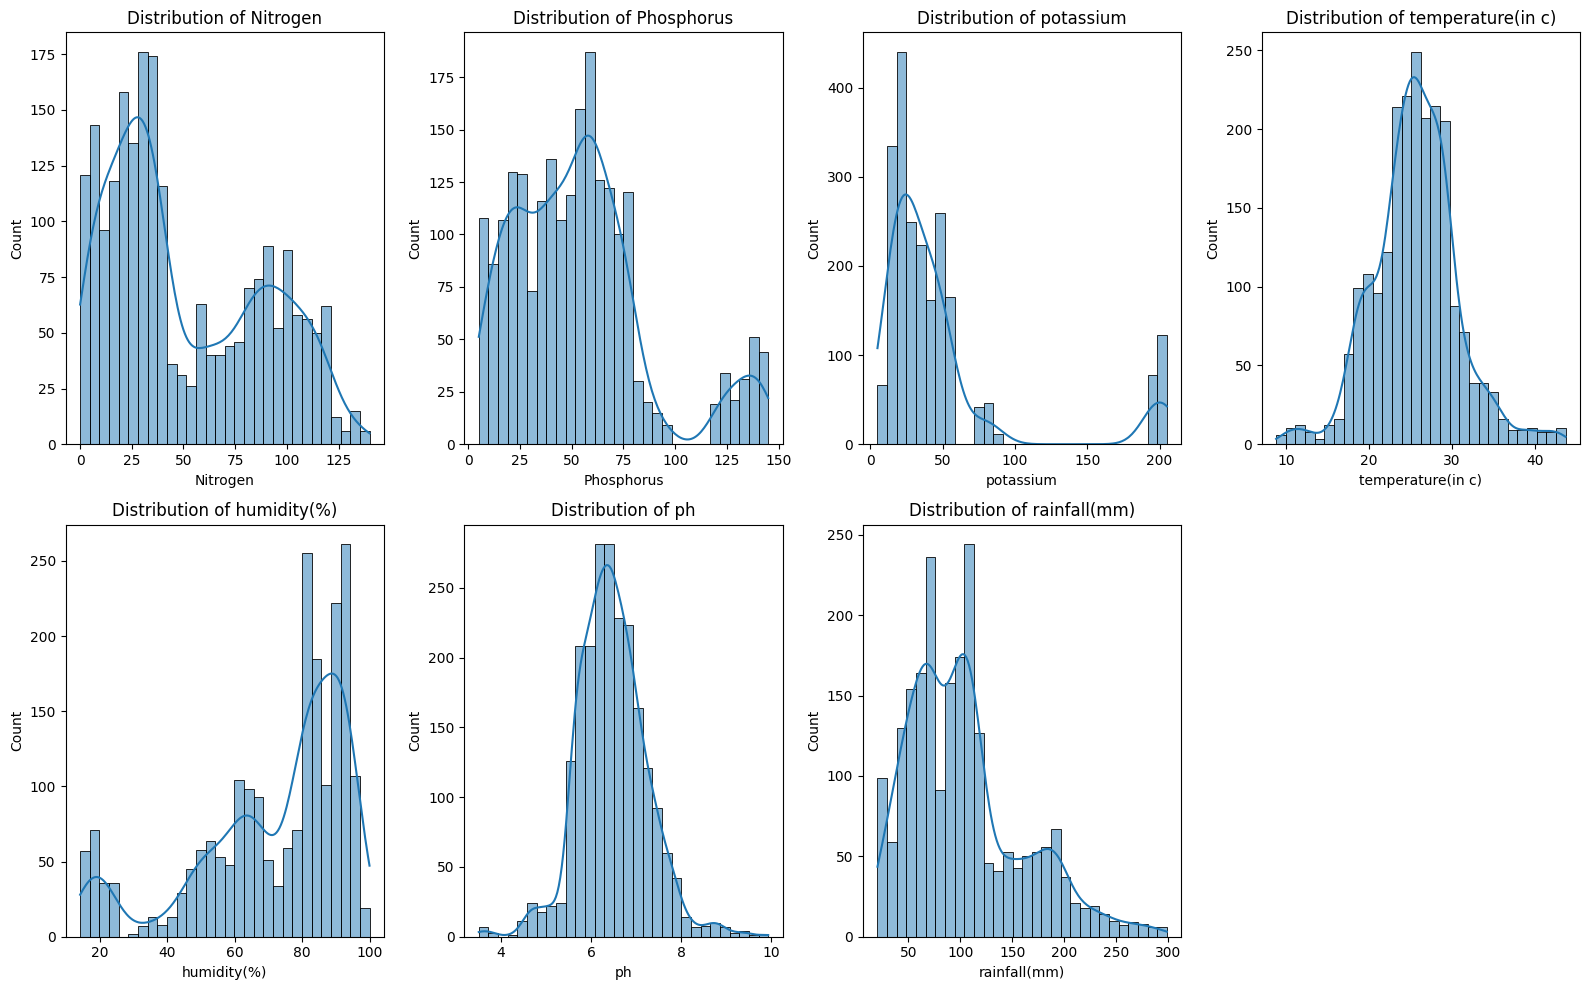

In [21]:
# Visualize Feature Distributions
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, (len(numerical_features)+1)//2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize Correlation Matrix
Finally, let's visualize the correlation matrix between numerical features using a heatmap.

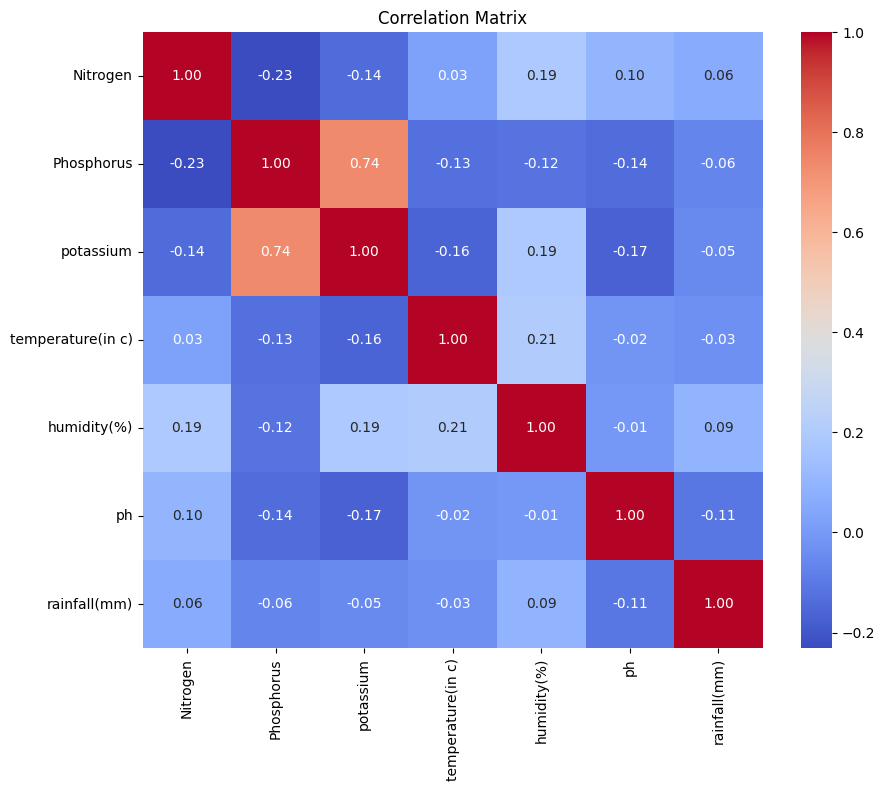

In [22]:
# Visualize Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Encode the crop column and then decode it back to original

from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing the original DataFrame
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the crop column (replace 'label' with your crop column name if different)
df_encoded['crop_encoded'] = le.fit_transform(df_encoded['crop'])

# Save the encoded DataFrame to a new CSV file
df_encoded.to_csv('Crop_recommendation_encoded.csv', index=False)



In [24]:
# Display 10 random rows with all columns from df_encoded
df_encoded.sample(n=10)

,Nitrogen,Phosphorus,potassium,temperature(in c),humidity(%),ph,rainfall(mm),crop,crop_encoded
1516,36,140,198,23.343864,91.476847,6.281884,104.426799,apple,0
1297,6,142,202,27.237083,82.945733,6.224543,70.425089,grapes,7
2183,93,26,27,24.592457,56.468296,7.288212,137.704405,coffee,5
1488,99,29,55,29.193787,91.462411,6.660955,26.482403,muskmelon,15
778,29,67,21,29.791811,63.387892,6.621324,63.021699,blackgram,2
816,37,62,22,24.020379,61.623133,7.397546,49.781026,lentil,10
1713,56,57,48,31.562138,93.048486,6.506121,63.622508,papaya,17
786,52,65,20,32.817052,66.156651,6.814301,68.839249,blackgram,2
582,19,51,25,26.804744,48.239914,3.525366,43.878020,mothbeans,13
650,36,43,21,28.363194,84.859361,7.140438,52.930311,mungbean,14


In [25]:
# Calculate correlation of all features with the encoded crop column
numeric_df = df_encoded.select_dtypes(include=[np.number])  # Only numeric columns
correlations = numeric_df.corr()['crop_encoded'].sort_values(ascending=False)

# Display the correlations (excluding the correlation of crop_encoded with itself)
print(correlations.drop('crop_encoded'))

humidity(%)          0.193911
temperature(in c)    0.113606
rainfall(mm)         0.045611
ph                  -0.012253
Nitrogen            -0.031130
potassium           -0.346417
Phosphorus          -0.491006
Name: crop_encoded, dtype: float64


In [26]:
df.isnull().sum()

Nitrogen             0
Phosphorus           0
potassium            0
temperature(in c)    0
humidity(%)          0
ph                   0
rainfall(mm)         0
crop                 0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.describe()

,Nitrogen,Phosphorus,potassium,temperature(in c),humidity(%),ph,rainfall(mm)
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: xlabel='count', ylabel='crop'>

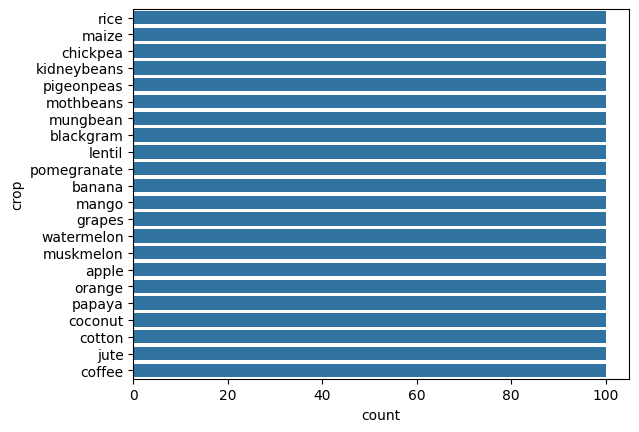

In [29]:
sns.countplot(df['crop'])

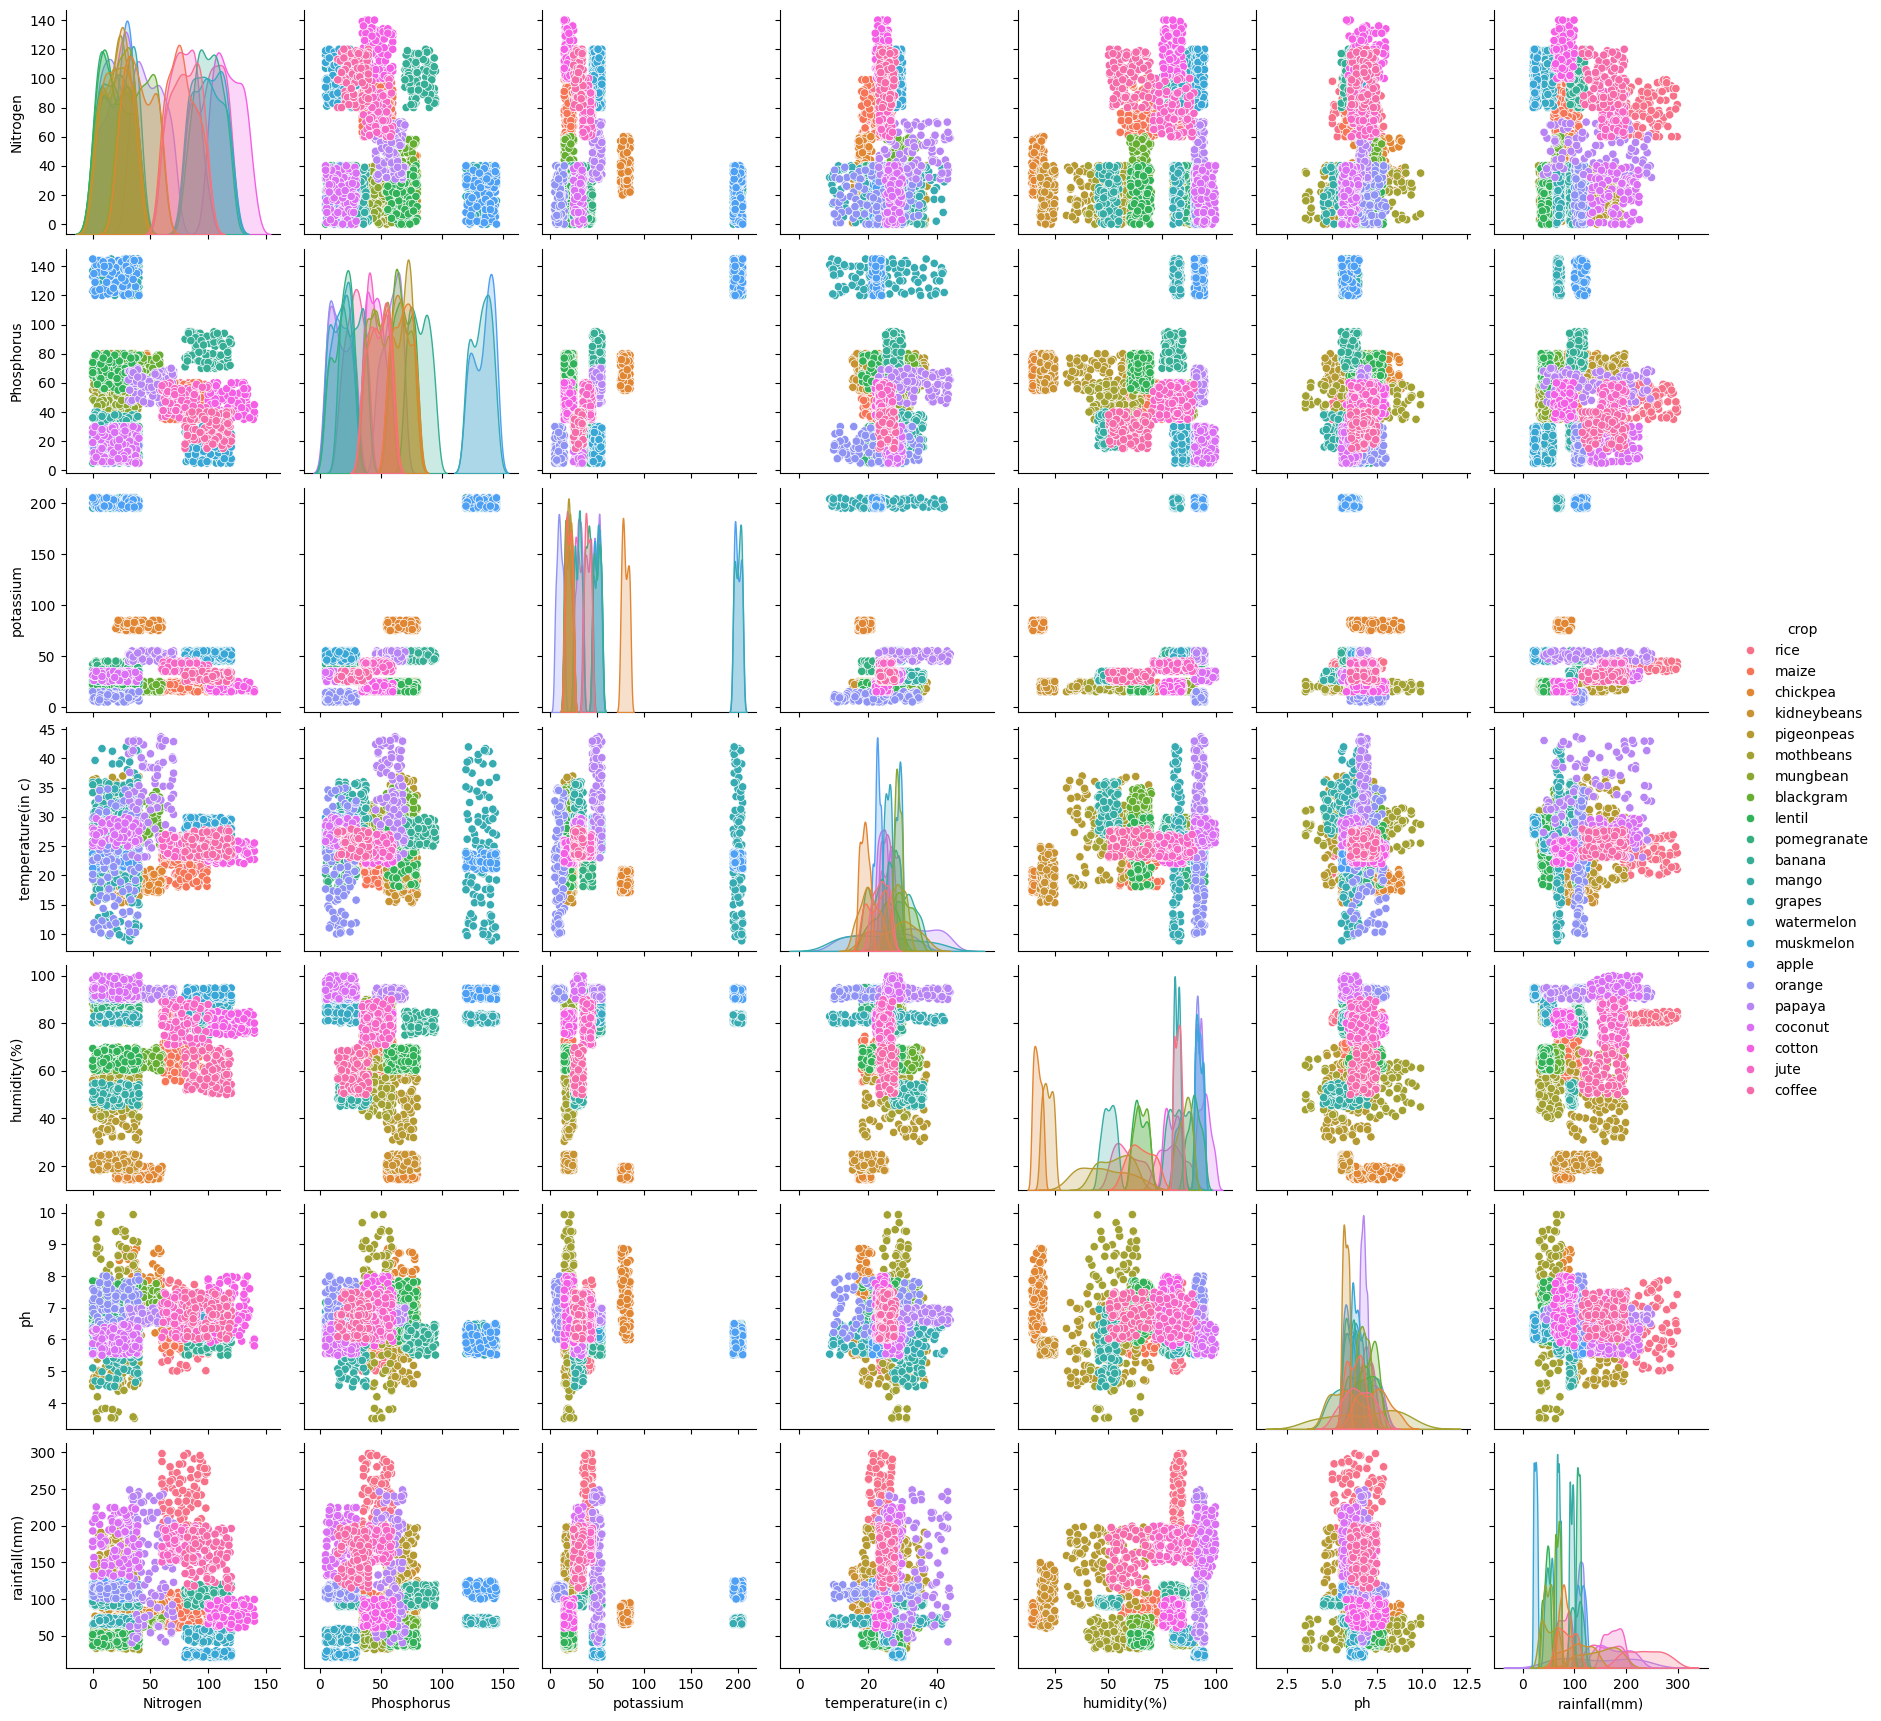

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for all numerical features colored by crop
sns.pairplot(df, hue='crop', diag_kind='kde', plot_kws={'alpha':1.0})
plt.show()

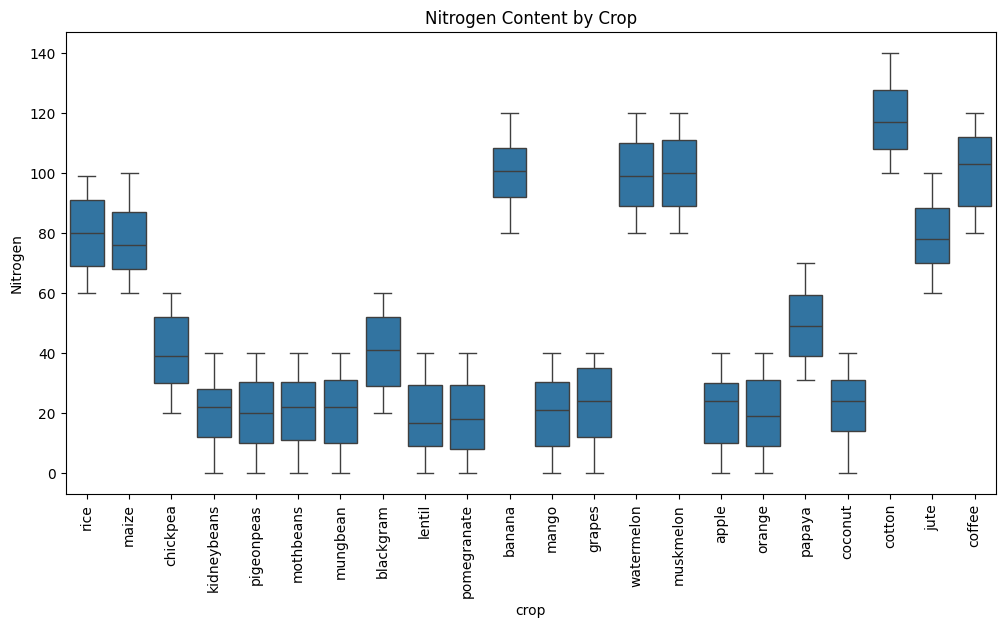

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='crop', y='Nitrogen', data=df)
plt.xticks(rotation=90)
plt.title('Nitrogen Content by Crop')
plt.show()

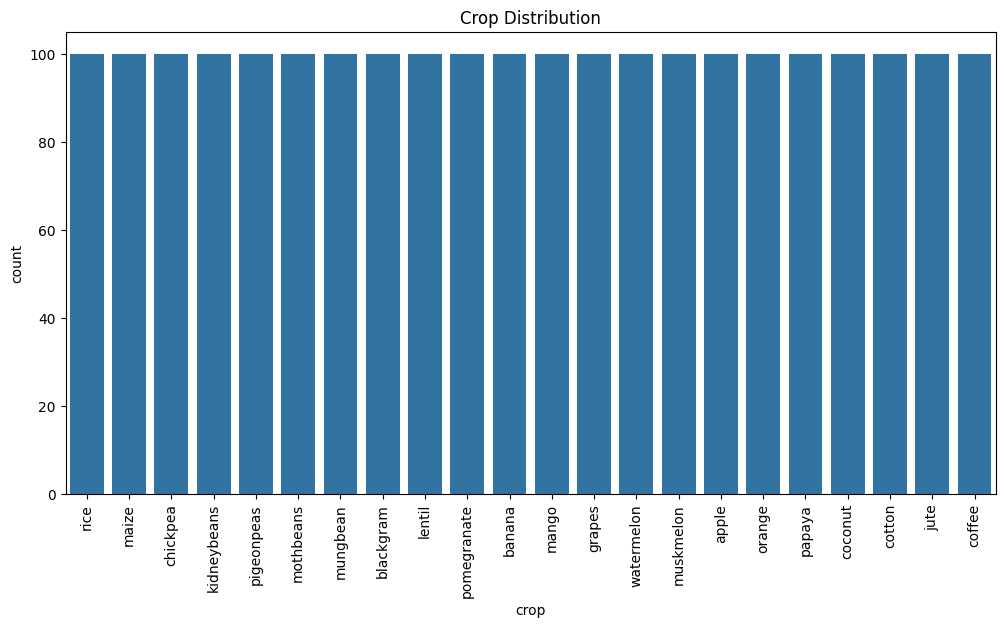

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='crop', data=df, order=df['crop'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crop Distribution')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('crop', axis=1)
y = df['crop']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1760, 7)
Testing set shape: (440, 7)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train_encoded)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test_encoded, y_pred))
print("R2 Score:", r2_score(y_test_encoded, y_pred))

MSE: 28.53618489781261
R2 Score: 0.29102646216614636


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Encode target variable
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluate each model
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train_enc)
    y_pred = model.predict(X_test)
    print("="*40)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test_enc, y_pred))
    print("Precision (macro):", precision_score(y_test_enc, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test_enc, y_pred, average='macro'))
    print("F1-score (macro):", f1_score(y_test_enc, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

c:\Users\mdaft\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.95
Precision (macro): 0.9519549562611764
Recall (macro): 0.95
F1-score (macro): 0.9499711527952862
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.67      0.70      0.68        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       0.83      0.75      0.79        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.79      0.75      0.77        20
    mungbean       1.00    

In [36]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Performance Comparison:
                 Model  Accuracy  Macro F1-Score  Worst Class F1  \
1        Random Forest    0.9955          0.9955          0.9744   
6          Naive Bayes    0.9955          0.9954          0.9474   
7              XGBoost    0.9932          0.9931          0.9474   
5    Gradient Boosting    0.9886          0.9887          0.9302   
2                  SVM    0.9841          0.9840          0.9189   
4        Decision Tree    0.9795          0.9794          0.8780   
3                  KNN    0.9795          0.9793          0.8947   
0  Logistic Regression    0.9727          0.9725          0.8649   

   Best Class F1  
1            1.0  
6            1.0  
7            1.0  
5            1.0  
2            1.0  
4            1.0  
3            1.0  
0            1.0  


<Figure size 1200x600 with 0 Axes>

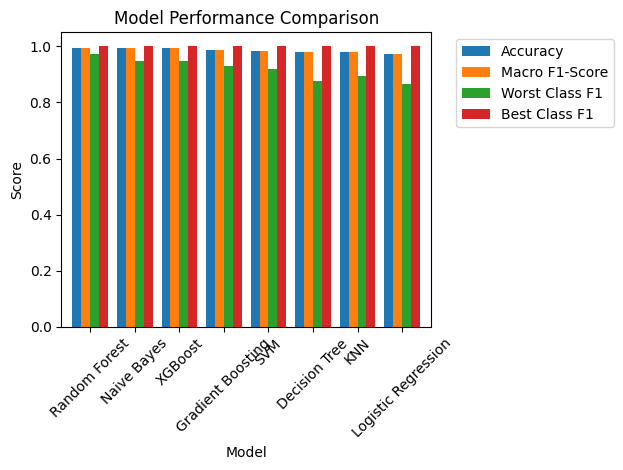

In [42]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# If not installed, install xgboost using: pip install xgboost
from xgboost import XGBClassifier

# Encode target variable
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with improved parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),  # Increased iterations
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Evaluate each model using scaled features
results = {
    'Model': [],
    'Accuracy': [],
    'Macro F1-Score': [],
    'Worst Class F1': [],
    'Best Class F1': []
}

for name, model in models.items():
    # Fit and predict using scaled features
    model.fit(X_train_scaled, y_train_enc)
    y_pred = model.predict(X_test_scaled)
    
    # Get detailed classification report
    report = classification_report(y_test_enc, y_pred, target_names=le.classes_, output_dict=True)
    
    # Extract metrics
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test_enc, y_pred))
    results['Macro F1-Score'].append(f1_score(y_test_enc, y_pred, average='macro'))
    
    # Find worst and best performing classes
    class_f1_scores = [metrics['f1-score'] for crop, metrics in report.items() 
                      if crop not in ['accuracy', 'macro avg', 'weighted avg']]
    results['Worst Class F1'].append(min(class_f1_scores))
    results['Best Class F1'].append(max(class_f1_scores))

# Convert to DataFrame for better visualization
performance_df = pd.DataFrame(results)
performance_df = performance_df.sort_values('Macro F1-Score', ascending=False)

# Display the results
print("Model Performance Comparison:")
print("============================")
print(performance_df.round(4))

# Visualize the performance metrics
plt.figure(figsize=(12, 6))
performance_df.plot(x='Model', y=['Accuracy', 'Macro F1-Score', 'Worst Class F1', 'Best Class F1'], 
                   kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Save the best model (Naive Bayes), scaler, and label encoder
import joblib

# Get the Naive Bayes model and fit it one final time
final_model = GaussianNB()
final_model.fit(X_train_scaled, y_train_enc)

# Save the model, scaler, and label encoder
joblib.dump(final_model, 'crop_prediction_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le, 'label_encoder.joblib')

print("Model and preprocessing objects saved successfully!")

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [10,30,40,50, 100, 150],
    'max_depth': [4,5,7,8,9, 10, 15]
}

# Initialize GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train_enc)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test_enc, y_pred))

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Best Parameters: {'max_depth': 9, 'n_estimators': 30}
Best Cross-Validation Score: 0.9954532504607799
Test Accuracy: 0.9931818181818182


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-10,1e-11,1e-9, 1e-8, 1e-7, 1e-6]
}

# Initialize GridSearchCV
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3, n_jobs=-1, verbose=2)
grid_nb.fit(X_train, y_train_enc)

# Best parameters and score
print("Best Parameters (Naive Bayes):", grid_nb.best_params_)
print("Best Cross-Validation Score (Naive Bayes):", grid_nb.best_score_)

# Evaluate on test set
y_pred_nb = grid_nb.predict(X_test)
print("Test Accuracy (Naive Bayes):", accuracy_score(y_test_enc, y_pred_nb))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters (Naive Bayes): {'var_smoothing': 1e-10}
Best Cross-Validation Score (Naive Bayes): 0.9954532504607799
Test Accuracy (Naive Bayes): 0.9954545454545455


In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [20,30,40,50, 100, 150],
    'max_depth': [2,3,4, 5,6, 7],
    'learning_rate': [0.01, 0.1, 0.2,0.25,0.3,0.4]
}

# Initialize GridSearchCV
grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid_xgb,
    cv=3,
    n_jobs=-1,
    verbose=2
)
grid_xgb.fit(X_train, y_train_enc)

# Best parameters and score
print("Best Parameters (XGBoost):", grid_xgb.best_params_)
print("Best Cross-Validation Score (XGBoost):", grid_xgb.best_score_)

# Evaluate on test set
y_pred_xgb = grid_xgb.predict(X_test)
print("Test Accuracy (XGBoost):", accuracy_score(y_test_enc, y_pred_xgb))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\mdaft\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:00:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30}
Best Cross-Validation Score (XGBoost): 0.9931827828200314
Test Accuracy (XGBoost): 0.990909090909091
